# Introducción

En literatura en inglés puedes ver términos como Montecarlo Sampling o Montecarlo Simulation usados indistintamente.

Los métodos de Monte Carlo son algoritmos que utilizan muestreo aleatorio repetido para obtener resultados numéricos en problemas físicos y matemáticos. Estos métodos son útiles cuando otros enfoques no son posibles, y se aplican en optimización, integración numérica y generación de muestras probabilísticas.

En física, son útiles para simular sistemas complejos como fluidos y materiales desordenados. También se aplican en situaciones inciertas, como el cálculo de riesgos en negocios, y en matemáticas para resolver integrales multidimensionales con condiciones complicadas.

El principio de los métodos de Monte Carlo puede usarse en problemas probabilísticos. Utilizan muestras de variables aleatorias para aproximar integrales definidas.

Ventajas: son relativamente sencillos, aunque las simulaciones de Monte Carlo pueden ser computacionalmente costosas. Para problemas complejos, se requieren muchas muestras, lo que puede llevar a largos tiempos de ejecución.

## El método

El método de Monte Carlo es flexible, pero tiende a mantener un patrón particular:

- Definir un dominio de posibles entradas.

- Generar entradas al azar a partir de una distribución de probabilidad en el dominio.

- Realizar un cálculo determinista en las entradas.

- Agregar los resultados.

- Estimación de integrales definidas

El siguiente código es un ejemplo de cómo podríamos estimar una integral definida usando Montecarlo.

### Calculadora de Integrales

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definición de los límites de integración
a = 0
b = 2
n = 20000

# Función a integrar
def f(x):
    return x**2

# Generamos puntos aleatorios
x = np.random.uniform(a, b, n)
y = np.random.uniform(f(a), f(b), n)

# Número de puntos bajo la curva
n_bajo_curva = np.sum(y < f(x))

#Respuesta
n_bajo_curva / n * (b-a) * (f(b) - f(a))

np.float64(2.6604)

<module 'matplotlib.pyplot' from 'c:\\Users\\samue\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

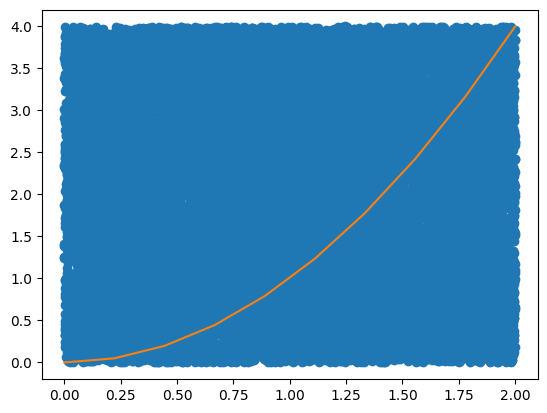

In [3]:
plt.plot(x,y,'o')
plt.plot(np.linspace(a, b, 10), f(np.linspace(a, b, 10)))
plt

### Agujas de Buffon - Lagrange

In [4]:
def estimar_pi_buffon(n_simulaciones = 100000, l = 1, d = 2):
    cruces = 0
    
    for i in range(n_simulaciones):

        # Simulas donde cae el centro de la aguja en una altura aleatoria
        centro_de_aguja = np.random.uniform(0, d/2)

        # Simulamos el ángulo de la aguja
        theta = np.random.uniform(0, np.pi/2)

        # La aguja cruzó?
        if (l/2) * np.sin(theta) >= centro_de_aguja:
            cruces += 1

    # Solo aplica si l < d
    return (2 * n_simulaciones * l) / (cruces* d)

In [5]:
estimar_pi_buffon()

3.1470292044310173

### Calculadora de Área de Círculo

In [6]:
def area_circulo(n_simulaciones=100000, r=1):
    x = np.random.uniform(0, r, n_simulaciones)
    y = np.random.uniform(0, r, n_simulaciones)

    dentro = x**2 + y**2 <= r**2

    # Plot de puntos
    plt.figure(figsize=(6,6))
    plt.scatter(x[dentro], y[dentro], color='green', label='Dentro del círculo')
    plt.scatter(x[~dentro], y[~dentro], color='red', label='Fuera del círculo')
    plt.plot(np.linspace(0, r, 200), np.sqrt(r**2 - np.linspace(0, r, 200)**2), label='Círculo')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0, r)
    plt.ylim(0, r)
    plt.legend()
    plt.show()

    return 4 * np.sum(dentro) / n_simulaciones

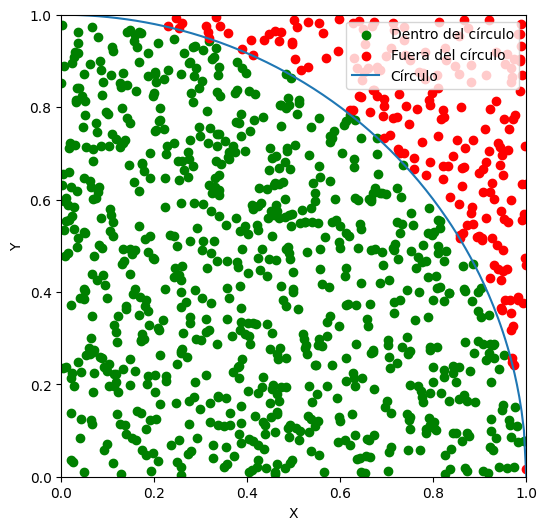

np.float64(3.196)

In [7]:
area_circulo(n_simulaciones=1000)